In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
clientes = pd.read_csv('C://ProjetosDataScience//20190826-EstudosDeTesteBebella//2-DadosPreparados/analise_clientes.csv', sep=';')
clientes.head()

,COL_COD,.dataUltCompra,.anosCasa,.mediaNumVendasAno,.frequenciaFat,.mediaRemessasConsigAno,.frequenciaConsig,.mediaConsigAno,.mediaFatAno
0,NaN,2019-11-05,3.84,5,74,73,5,128441.75,318.93
1,10003.0,2019-09-18,0.28,2,60,3,40,3586.00,2378.70
2,10006.0,2017-10-31,0.00,1,30,0,0,0.00,947.00
3,10021.0,2016-04-26,0.04,2,15,2,15,678.40,685.55
4,10025.0,NaN,0.00,0,0,0,0,0.00,0.00


In [41]:
clientes.rename(columns={'COL_COD': '.colCod'}, inplace = True)

In [42]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12139 entries, 0 to 12138
Data columns (total 9 columns):
.colCod                    12138 non-null float64
.dataUltCompra             10688 non-null object
.anosCasa                  12139 non-null float64
.mediaNumVendasAno         12139 non-null int64
.frequenciaFat             12139 non-null int64
.mediaRemessasConsigAno    12139 non-null int64
.frequenciaConsig          12139 non-null int64
.mediaConsigAno            12139 non-null float64
.mediaFatAno               12139 non-null float64
dtypes: float64(4), int64(4), object(1)
memory usage: 853.6+ KB


In [43]:
clientes.describe()

,.colCod,.anosCasa,.mediaNumVendasAno,.frequenciaFat,.mediaRemessasConsigAno,.frequenciaConsig,.mediaConsigAno,.mediaFatAno
count,12138.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000,12139.000000
mean,32770.178777,0.665958,3.359750,56.054617,1.757558,33.593294,1521.299608,4371.219996
std,12054.697801,1.023083,5.739282,79.200264,6.953803,125.855197,6763.761994,7999.883482
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-983.230000
25%,25541.750000,0.000000,1.000000,30.000000,0.000000,0.000000,0.000000,758.550000
50%,37784.500000,0.110000,2.000000,30.000000,0.000000,0.000000,0.000000,1817.590000
75%,41316.500000,1.000000,4.000000,60.000000,0.000000,0.000000,0.000000,4620.980000
max,45103.000000,3.840000,238.000000,1410.000000,147.000000,1410.000000,314915.730000,155360.260000


### Verificação dos dados

Verificando a existência de: 

- Valores nulos
- Número de vendas suspeito
- Média de faturamento suspeita

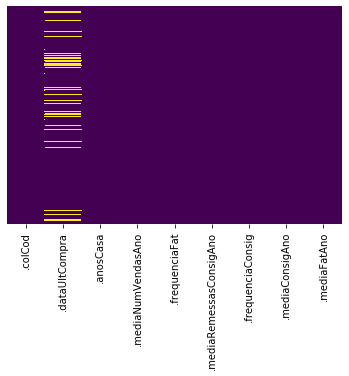

In [44]:
sns.heatmap(clientes.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Percebi que existem registros sem a anotação da data de última compra, referente a clientes que compraram apenas na matriz ou em bazares.

Como essa amostra provavelmente é pequena o suficiente para não afetar o resultado de minha pesquisa, vou retirá-la do conjunto de dados.

In [45]:
clientes.dropna(inplace = True)

In [46]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10687 entries, 1 to 12138
Data columns (total 9 columns):
.colCod                    10687 non-null float64
.dataUltCompra             10687 non-null object
.anosCasa                  10687 non-null float64
.mediaNumVendasAno         10687 non-null int64
.frequenciaFat             10687 non-null int64
.mediaRemessasConsigAno    10687 non-null int64
.frequenciaConsig          10687 non-null int64
.mediaConsigAno            10687 non-null float64
.mediaFatAno               10687 non-null float64
dtypes: float64(4), int64(4), object(1)
memory usage: 834.9+ KB


Removi todos os clientes com media de faturamento mensal menor ou igual a zero, pois eles não interessam para o aprendizado do algoritmo.

In [47]:
clientes.drop(clientes.loc[clientes['.mediaFatAno'] <= 0].index, inplace = True)

In [48]:
clientes.describe()

,.colCod,.anosCasa,.mediaNumVendasAno,.frequenciaFat,.mediaRemessasConsigAno,.frequenciaConsig,.mediaConsigAno,.mediaFatAno
count,10447.000000,10447.000000,10447.000000,10447.000000,10447.000000,10447.000000,10447.000000,10447.00000
mean,33327.775246,0.768216,3.879583,63.459462,2.027855,38.644108,1748.126088,5079.34437
std,11995.505909,1.062039,6.024700,77.915173,7.420514,134.092137,7146.988453,8412.27276
min,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.05000
25%,26429.000000,0.000000,1.000000,30.000000,0.000000,0.000000,0.000000,1167.00000
50%,38430.000000,0.200000,2.000000,30.000000,0.000000,0.000000,0.000000,2275.16000
75%,41765.500000,1.200000,4.000000,66.000000,1.000000,13.000000,448.290000,5433.80000
max,45103.000000,3.840000,238.000000,1290.000000,147.000000,1410.000000,314915.730000,155360.26000


In [49]:
clientes.loc[clientes['.mediaNumVendasAno'] == 238]

,.colCod,.dataUltCompra,.anosCasa,.mediaNumVendasAno,.frequenciaFat,.mediaRemessasConsigAno,.frequenciaConsig,.mediaConsigAno,.mediaFatAno
1249,2.0,2019-10-31,3.84,238,2,0,1410,111.08,83374.57
4786,37288.0,2019-11-05,3.31,238,2,2,176,5371.27,9793.98


Em verificação no sistema, percebi que esse cliente de código 37288 é provavelmente uma ferramenta apenas para manobrar trocas, por isso resolvi retirá-lo também da amostra para que ele não influencie o algoritmo de correlação.

Já o cliente de código 2 chama-se "Consumidor Final" e ali são registradas as vendas de varejo, sua presença também irá distorcer o aprendizado do algoritmo, portanto vou removê-los.

In [50]:
clientes.drop(clientes.loc[clientes['.colCod'] == 37288].index, inplace = True)
clientes.drop(clientes.loc[clientes['.colCod'] == 2].index, inplace = True)

In [51]:
clientes.describe()

,.colCod,.anosCasa,.mediaNumVendasAno,.frequenciaFat,.mediaRemessasConsigAno,.frequenciaConsig,.mediaConsigAno,.mediaFatAno
count,10445.000000,10445.000000,10445.000000,10445.00000,10445.000000,10445.000000,10445.000000,10445.000000
mean,33330.586692,0.767678,3.834753,63.47123,2.028052,38.499665,1747.935940,5071.397040
std,11992.158612,1.061423,5.079913,77.91799,7.421198,133.425074,7147.566858,8377.991383
min,30.000000,0.000000,0.000000,5.00000,0.000000,0.000000,0.000000,0.050000
25%,26430.000000,0.000000,1.000000,30.00000,0.000000,0.000000,0.000000,1167.000000
50%,38431.000000,0.200000,2.000000,30.00000,0.000000,0.000000,0.000000,2275.030000
75%,41766.000000,1.200000,4.000000,66.00000,1.000000,13.000000,448.080000,5431.600000
max,45103.000000,3.840000,74.000000,1290.00000,147.000000,1410.000000,314915.730000,155360.260000


In [53]:
clientes.loc[clientes['.mediaNumVendasAno'] == 74]

,.colCod,.dataUltCompra,.anosCasa,.mediaNumVendasAno,.frequenciaFat,.mediaRemessasConsigAno,.frequenciaConsig,.mediaConsigAno,.mediaFatAno
9365,42563.0,2019-11-04,1.08,74,5,0,0,0.0,29725.97


Continuando a verificação no sistema, percebi que o cliente 17064 trata-se de envio de peças para desfile e/ou revista.

Por isso removi da amostra para não influenciar no aprendizado do algoritmo.

In [57]:
clientes.loc[clientes['.colCod'] == 17064]

,.colCod,.dataUltCompra,.anosCasa,.mediaNumVendasAno,.frequenciaFat,.mediaRemessasConsigAno,.frequenciaConsig,.mediaConsigAno,.mediaFatAno
975,17064.0,2019-11-01,3.79,1,705,19,19,7473.39,61.81


In [58]:
clientes.drop(clientes.loc[clientes['.colCod'] == 17064].index, inplace = True)

In [64]:
clientes.describe()

,.colCod,.anosCasa,.mediaNumVendasAno,.frequenciaFat,.mediaRemessasConsigAno,.frequenciaConsig,.mediaConsigAno,.mediaFatAno
count,10444.000000,10444.000000,10444.000000,10444.000000,10444.000000,10444.000000,10444.000000,10444.000000
mean,33332.144198,0.767389,3.835025,63.409805,2.026427,38.501532,1747.387735,5071.876701
std,11991.676244,1.061062,5.080080,77.668402,7.419695,133.431326,7147.689467,8378.249075
min,30.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.050000
25%,26433.750000,0.000000,1.000000,30.000000,0.000000,0.000000,0.000000,1167.000000
50%,38431.500000,0.200000,2.000000,30.000000,0.000000,0.000000,0.000000,2275.095000
75%,41766.250000,1.200000,4.000000,66.000000,1.000000,13.000000,444.757500,5432.000000
max,45103.000000,3.840000,74.000000,1290.000000,147.000000,1410.000000,314915.730000,155360.260000


### Começando as análises

Vamos analisar algumas condições para compreender nossos dados.

Condição 1: quanto mais tempo de casa, maior o consumo mensal?

In [65]:
clientes.columns

Index(['.colCod', '.dataUltCompra', '.anosCasa', '.mediaNumVendasAno',
       '.frequenciaFat', '.mediaRemessasConsigAno', '.frequenciaConsig',
       '.mediaConsigAno', '.mediaFatAno'],
      dtype='object')

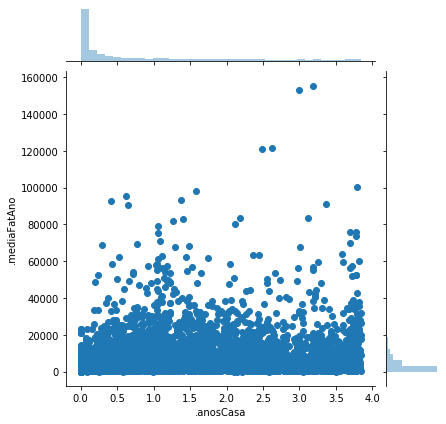

In [66]:
sns.jointplot(x='.anosCasa',y='.mediaFatAno',data=clientes)

Condição 2: existe relação entre a frequência de compras media de consumo mensal?

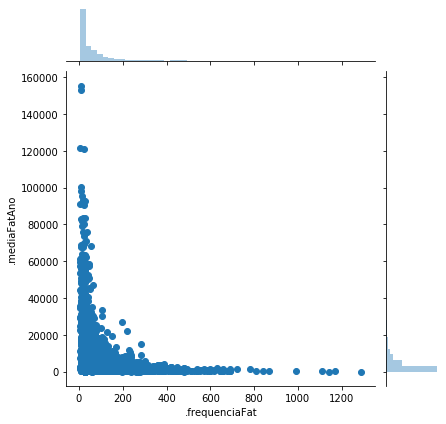

In [68]:
sns.jointplot(x='.frequenciaFat',y='.mediaFatAno',data=clientes)

In [74]:
clientes.loc[clientes['.mediaFatAno'] > 100000]

,.colCod,.dataUltCompra,.anosCasa,.mediaNumVendasAno,.frequenciaFat,.mediaRemessasConsigAno,.frequenciaConsig,.mediaConsigAno,.mediaFatAno
1945,24711.0,2019-10-29,3.79,45,8,1,282,475.80,100447.56
3751,36087.0,2019-02-17,2.99,42,9,0,0,0.00,152893.85
5228,37777.0,2019-10-31,3.18,37,10,0,0,0.00,155360.26
6443,39262.0,2019-10-31,2.62,53,7,0,0,0.00,121268.19
6743,39618.0,2019-11-05,2.48,18,21,130,3,136364.96,120733.00


Verificando correlação em todos os pares

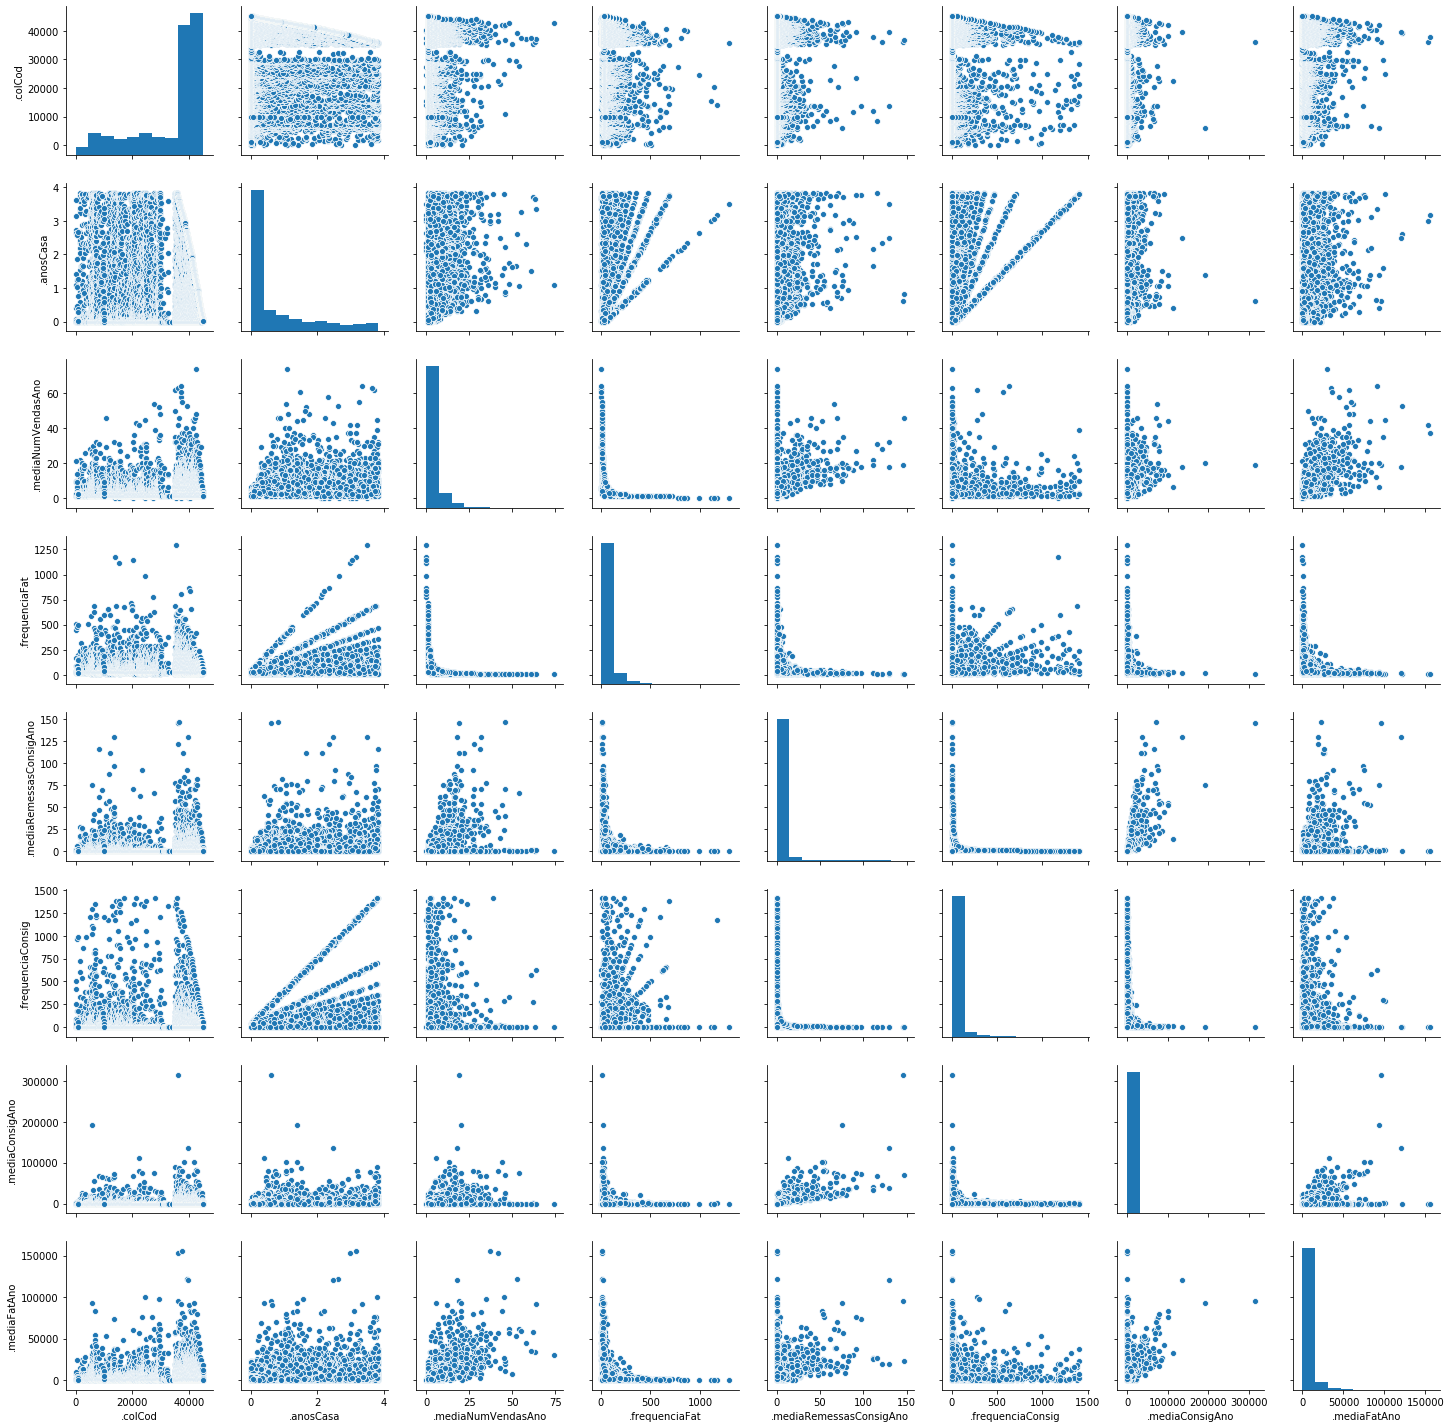

In [75]:
sns.pairplot(clientes)

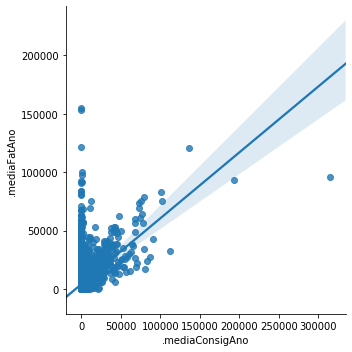

In [80]:
sns.lmplot(x='.mediaConsigAno', y='.mediaFatAno', data=clientes)

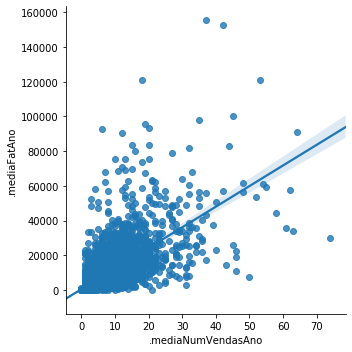

In [78]:
sns.lmplot(x='.mediaNumVendasAno', y='.mediaFatAno', data=clientes)

Ainda assim, é uma correlação muito vaga, não serve como base para aprendizado e previsões.

### Checando os índices de correlação:

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [84]:
clientes.columns

Index(['.colCod', '.dataUltCompra', '.anosCasa', '.mediaNumVendasAno',
       '.frequenciaFat', '.mediaRemessasConsigAno', '.frequenciaConsig',
       '.mediaConsigAno', '.mediaFatAno'],
      dtype='object')

In [85]:
X = clientes[['.anosCasa', '.mediaNumVendasAno','.frequenciaFat', '.mediaRemessasConsigAno', 
              '.frequenciaConsig', '.mediaConsigAno']]
y = clientes['.mediaFatAno']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [87]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Previsão dos dados de teste



In [88]:
previsoes = lm.predict(X_test)

Text(0, 0.5, 'Y Previsto')

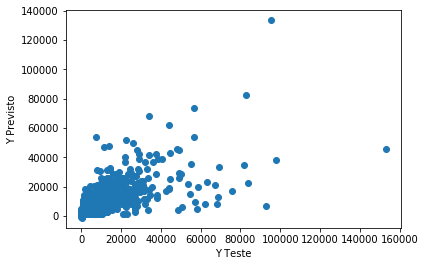

In [89]:
plt.scatter(y_test,previsoes)
plt.xlabel('Y Teste')
plt.ylabel('Y Previsto')

### Avaliando o modelo

In [91]:
from sklearn import metrics

print('Erro médio absoluto:', metrics.mean_absolute_error(y_test, previsoes))
print('Erro médio quadrado:', metrics.mean_squared_error(y_test, previsoes))
print('Raiz do erro médio quadrado:', np.sqrt(metrics.mean_squared_error(y_test, previsoes)))

Erro médio absoluto: 2609.9110829917654
Erro médio quadrado: 37089186.334107555
Raiz do erro médio quadrado: 6090.089189339312


### Resíduos

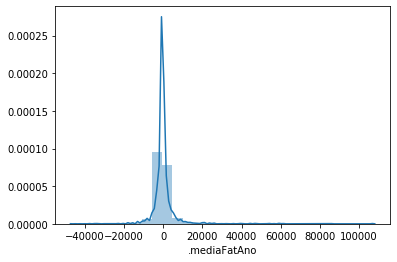

In [97]:
sns.distplot((y_test-previsoes), bins = 30);

In [98]:
coeficientes = pd.DataFrame(lm.coef_,X.columns)
coeficientes.columns = ['Coeficiente']
coeficientes

,Coeficiente
.anosCasa,325.316988
.mediaNumVendasAno,1053.794058
.frequenciaFat,-2.196540
.mediaRemessasConsigAno,-198.524140
.frequenciaConsig,-0.553235
.mediaConsigAno,0.450533


### Conclusões:

- Quanto mais antigo é o cliente, maior é a média de consumo anual
+ Quanto maior é a média de visitas do cliente na loja, maior é sua média de consumo anual.
- Quanto maior é a distância média em dias entre cada visita na loja, menor é a média de consumo anual do cliente.
- Quanto maior é a média de remessas em consignação que o cliente recebe, menor é a sua média de consumo anual.
- A distância média em dias entre as remessas em consignação e a média de volume remetido em consignação por ano não apresentam relevancia para o modelo.

Com base nessas informações, concluo que os investimentos mais eficientes serão aqueles contemplados no esforço de fidelização do cliente, buscando aumentar sua quantidade de visitas na loja e o seu interesse pela marca ao longo do tempo.